In [76]:
import clana.optimize
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
import networkx as nx


In [89]:
cm = np.array([
 [100,   0,   0,   0,   0,  25,   4,   0,   0,   0],
 [  0, 100,   0,  10,   3,   0,   0,   0,   5,  20],
 [  0,   0, 200,   0,   0,   0,   0,  20,   0,   0],
 [  0,   0,   0, 180,  10,   0,   0,   0,   0,   0],
 [  0,   0,   0,  10, 220,   0,   0,   0,  10,   0],
 [  0,   0,   0,   0,   0, 250,   0,   0,   0,   0],
 [  0,   0,   0,   0,   0,   1, 300,   0,   0,   0],
 [  0,   0,   0,   0,   0,   0,   0, 180,   0,   0],
 [  0,   0,   0,  20,   0,   0,   0,   0, 150,   5],
 [  0,   0,   0,  10,  30,   0,   0,   0,   0, 100]])

classes = np.arange(10)



In [85]:
def show_cm(cm, classes, diag_zero = False, ax=None, show=True):
    cm_copy = cm.copy()
    if diag_zero:
        np.fill_diagonal(cm_copy, 0)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_copy, display_labels=classes)

    disp.plot(cmap=plt.cm.Blues, ax=ax)
    if show:
        plt.show()

def show_cm_with_without_diag(cm, clases):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
    show_cm(cm, classes, ax=axes[0], show=False)
    show_cm(cm, classes, diag_zero=True, ax=axes[1])

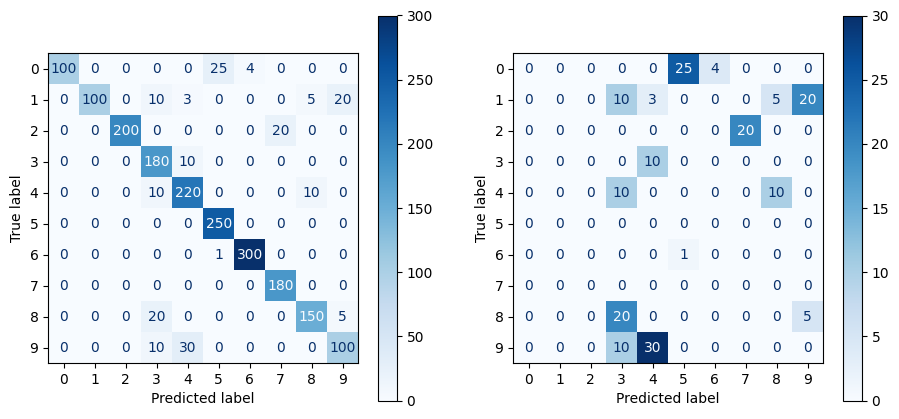

In [90]:
show_cm_with_without_diag(cm, classes)

In [91]:
result = clana.optimize.simulated_annealing(cm)
result

OptimizationResult(cm=array([[100,  20,   3,  10,   5,   0,   0,   0,   0,   0],
       [  0, 100,  30,  10,   0,   0,   0,   0,   0,   0],
       [  0,   0, 220,  10,  10,   0,   0,   0,   0,   0],
       [  0,   0,  10, 180,   0,   0,   0,   0,   0,   0],
       [  0,   5,   0,  20, 150,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 300,   0,   1,   0,   0],
       [  0,   0,   0,   0,   0,   4, 100,  25,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 250,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 200,  20],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 180]]), perm=array([1, 9, 4, 3, 8, 6, 0, 5, 2, 7]))

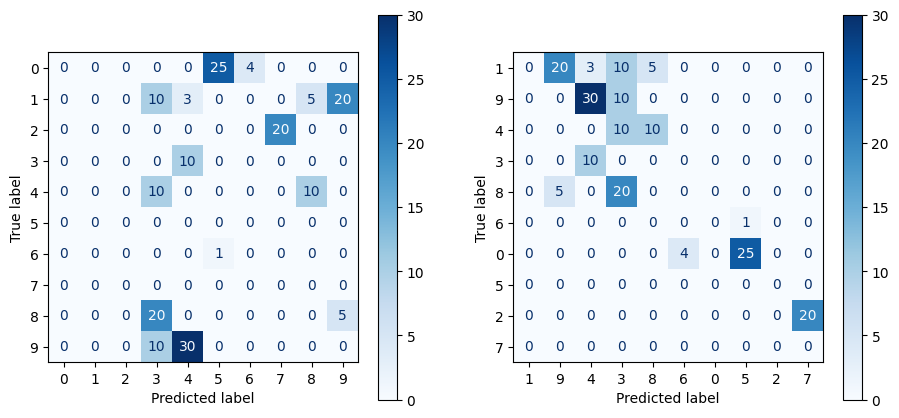

In [92]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 5))
show_cm(cm, classes, ax=axes[0], diag_zero=True, show=False)
show_cm(result.cm, classes[result.perm], diag_zero=True, ax=axes[1])

In [106]:
G = nx.from_numpy_array(cm)
composantes_connexes = list(nx.connected_components(G))
composantes_connexes = [[e for e in s] for s in composantes_connexes]
composantes_connexes

[[0, 5, 6], [1, 3, 4, 8, 9], [2, 7]]

In [119]:
sub_cms = [
    cm[sub,:][:,sub]
    for sub in composantes_connexes
]
sub_classes = [
    classes[sub]
    for sub in composantes_connexes
]
print(sub_classes)
sub_cms

[array([0, 5, 6]), array([1, 3, 4, 8, 9]), array([2, 7])]


[array([[100,  25,   4],
        [  0, 250,   0],
        [  0,   1, 300]]),
 array([[100,  10,   3,   5,  20],
        [  0, 180,  10,   0,   0],
        [  0,  10, 220,  10,   0],
        [  0,  20,   0, 150,   5],
        [  0,  10,  30,   0, 100]]),
 array([[200,  20],
        [  0, 180]])]

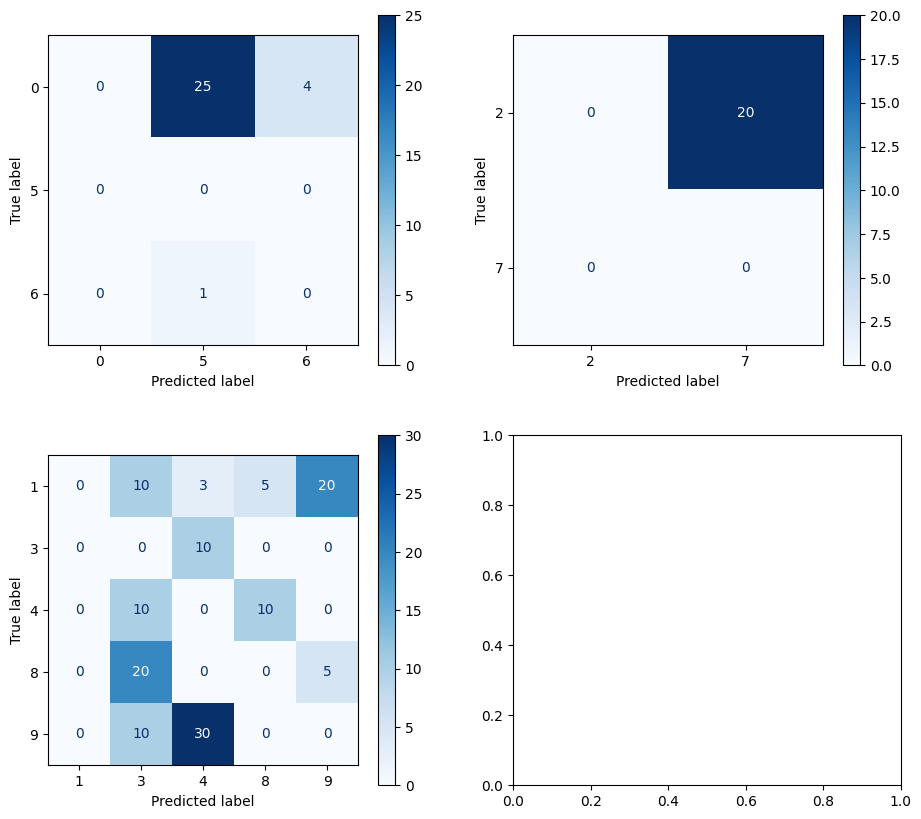

In [122]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 10))
for sub_cm, sub_class, i in zip(sub_cms, sub_classes, range(len(sub_cms))):
    show_cm(sub_cm, sub_class, ax=axes[i % 2, i // 2], diag_zero=True, show=(i == 2))